In [1]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta

# Setup
fake = Faker()
np.random.seed(83)
random.seed(83)

n_rides = 10000
rider_genders = ['F', 'M']
driver_genders = ['F', 'M']
regions = ['Downtown', 'Uptown', 'Suburb', 'Airport', 'East Side', 'West Side']
groups = ['A', 'B']

# Simulate data
data = []
for i in range(n_rides):
    ride_id = i + 1
    rider_id = f"r_{random.randint(1000, 9999)}"
    driver_id = f"d_{random.randint(1000, 9999)}"
    
    group = np.random.choice(groups)
    rider_gender = np.random.choice(rider_genders, p=[0.5, 0.5])
    region = np.random.choice(regions)
    
    # request time between 6 AM and 11 PM over a week
    random_time = fake.date_time_between(start_date='-7d', end_date='now')
    
    # Test group logic: if female rider in group A → match with female driver
    if group == 'A' and rider_gender == 'F':
        driver_gender = np.random.choice(['F', 'M'], p=[0.8, 0.2])
    else:
        driver_gender = np.random.choice(driver_genders)
    
    # Simulate wait time
    base_wait = np.random.normal(5, 2)
    wait_time = max(1, round(base_wait + (0.5 if group == 'A' else 1), 1))
    
    # Simulate ride completion
    ride_completed = np.random.choice([1, 0], p=[0.95, 0.05]) if group == 'A' else np.random.choice([1, 0], p=[0.90, 0.10])
    
    # Simulate satisfaction score
    if rider_gender == 'F' and driver_gender == 'F':
        satisfaction = np.random.normal(4.5, 0.4)
    else:
        satisfaction = np.random.normal(4.1, 0.6)
    satisfaction = int(np.clip(round(satisfaction), 1, 5))
    
    # Simulate feedback
    feedback_comment = None
    if satisfaction <= 3:
        feedback_comment = np.random.choice([
            "Driver was rude", "Long wait time", "Didn't feel safe", "Poor route taken", "Late arrival"
        ])
    elif satisfaction >= 4:
        feedback_comment = np.random.choice([
            "Great experience", "Driver was kind", "Felt safe", "Quick and easy", "Will use again"
        ])
    
    data.append([
        ride_id, rider_id, driver_id, rider_gender, driver_gender,
        group, region, random_time, wait_time, ride_completed,
        satisfaction, feedback_comment
    ])

# Create dataframe
columns = [
    'ride_id', 'rider_id', 'driver_id', 'rider_gender', 'driver_gender',
    'group', 'region', 'request_time', 'wait_time_minutes', 'ride_completed',
    'satisfaction_score', 'feedback_comment'
]
df = pd.DataFrame(data, columns=columns)

In [2]:
df.to_csv("gender_matching_ab_test.csv", index=False)

# Test if CSV created
df_test = pd.read_csv("gender_matching_ab_test.csv")
df_test.head()

,ride_id,rider_id,driver_id,rider_gender,driver_gender,group,region,request_time,wait_time_minutes,ride_completed,satisfaction_score,feedback_comment
0,1,r_9129,d_8535,M,F,A,Downtown,2025-08-02 05:39:11,6.7,1,4,Great experience
1,2,r_2453,d_3098,M,F,A,Downtown,2025-08-02 09:28:49,6.7,1,3,Driver was rude
2,3,r_7200,d_1563,M,M,B,West Side,2025-08-03 01:15:25,8.5,1,4,Great experience
3,4,r_1805,d_4476,F,F,A,Suburb,2025-08-07 01:21:46,2.5,1,5,Will use again
4,5,r_4099,d_3848,F,M,B,Airport,2025-08-06 07:22:16,7.2,1,4,Quick and easy


In [3]:
rows, cols = df_test.shape
print(f"The dataset has {rows:,} rows and {cols} columns.")

The dataset has 10,000 rows and 12 columns.


In [4]:
df_test.shape         # Number of rows and columns
df_test.describe()    # Summary stats for numeric columns
df_test['group'].value_counts()  # Confirm A/B distribution

group
A    5009
B    4991
Name: count, dtype: int64

In [5]:
import pandas as pd

# Load the CSV
df = pd.read_csv("gender_matching_ab_test.csv")

# Preview first few rows
print(df.head())

   ride_id rider_id driver_id rider_gender driver_gender group     region  \
0        1   r_9129    d_8535            M             F     A   Downtown   
1        2   r_2453    d_3098            M             F     A   Downtown   
2        3   r_7200    d_1563            M             M     B  West Side   
3        4   r_1805    d_4476            F             F     A     Suburb   
4        5   r_4099    d_3848            F             M     B    Airport   

          request_time  wait_time_minutes  ride_completed  satisfaction_score  \
0  2025-08-02 05:39:11                6.7               1                   4   
1  2025-08-02 09:28:49                6.7               1                   3   
2  2025-08-03 01:15:25                8.5               1                   4   
3  2025-08-07 01:21:46                2.5               1                   5   
4  2025-08-06 07:22:16                7.2               1                   4   

   feedback_comment  
0  Great experience  
1   Dr

In [6]:
# Shape of the dataset
print("Shape:", df.shape)

# Column data types and non-null counts
print(df.info())

# Quick stats for numeric columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

Shape: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             10000 non-null  int64  
 1   rider_id            10000 non-null  object 
 2   driver_id           10000 non-null  object 
 3   rider_gender        10000 non-null  object 
 4   driver_gender       10000 non-null  object 
 5   group               10000 non-null  object 
 6   region              10000 non-null  object 
 7   request_time        10000 non-null  object 
 8   wait_time_minutes   10000 non-null  float64
 9   ride_completed      10000 non-null  int64  
 10  satisfaction_score  10000 non-null  int64  
 11  feedback_comment    10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB
None
           ride_id  wait_time_minutes  ride_completed  satisfaction_score
count  10000.00000       10000.000000    100

In [7]:
# Group distribution
print("Group distribution:\n", df['group'].value_counts())

# Rider gender distribution
print("Rider gender distribution:\n", df['rider_gender'].value_counts())

# Driver gender distribution
print("Driver gender distribution:\n", df['driver_gender'].value_counts())

# Ride completion breakdown
print("Ride completion breakdown:\n", df['ride_completed'].value_counts())

# Satisfaction score range
print("Satisfaction score:\n", df['satisfaction_score'].value_counts().sort_index())

# Wait time distribution
print("Wait time stats:\n", df['wait_time_minutes'].describe())

Group distribution:
 group
A    5009
B    4991
Name: count, dtype: int64
Rider gender distribution:
 rider_gender
F    5007
M    4993
Name: count, dtype: int64
Driver gender distribution:
 driver_gender
F    5851
M    4149
Name: count, dtype: int64
Ride completion breakdown:
 ride_completed
1    9275
0     725
Name: count, dtype: int64
Satisfaction score:
 satisfaction_score
2      27
3    1036
4    5628
5    3309
Name: count, dtype: int64
Wait time stats:
 count    10000.000000
mean         5.723400
std          2.019028
min          1.000000
25%          4.300000
50%          5.700000
75%          7.100000
max         13.400000
Name: wait_time_minutes, dtype: float64


In [8]:
# Drop rows with missing critical values
df_clean = df.dropna(subset=['ride_completed', 'satisfaction_score', 'wait_time_minutes'])

# Optional: Convert satisfaction to integer if it's float
df_clean['satisfaction_score'] = df_clean['satisfaction_score'].astype(int)

# Check for negative wait times
print(df_clean[df_clean['wait_time_minutes'] < 0])

Empty DataFrame
Columns: [ride_id, rider_id, driver_id, rider_gender, driver_gender, group, region, request_time, wait_time_minutes, ride_completed, satisfaction_score, feedback_comment]
Index: []


In [9]:
print(df.isnull().sum())


ride_id               0
rider_id              0
driver_id             0
rider_gender          0
driver_gender         0
group                 0
region                0
request_time          0
wait_time_minutes     0
ride_completed        0
satisfaction_score    0
feedback_comment      0
dtype: int64


In [10]:
print(df_clean.shape)


(10000, 12)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


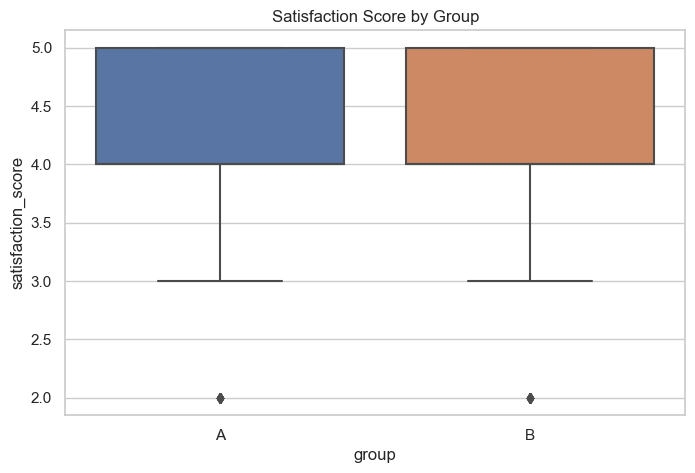

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="group", y="satisfaction_score", data=df_clean)
plt.title("Satisfaction Score by Group")
plt.show()


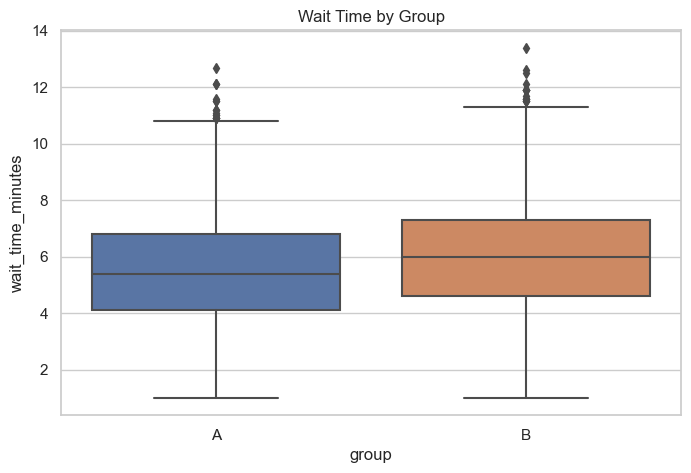

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="group", y="wait_time_minutes", data=df_clean)
plt.title("Wait Time by Group")
plt.show()


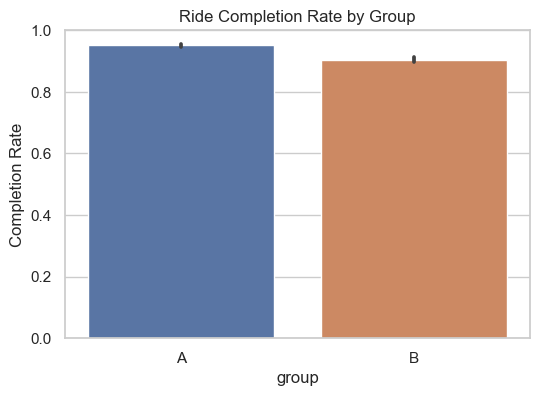

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(x="group", y="ride_completed", data=df_clean, estimator=lambda x: sum(x) / len(x))
plt.title("Ride Completion Rate by Group")
plt.ylabel("Completion Rate")
plt.ylim(0, 1)
plt.show()


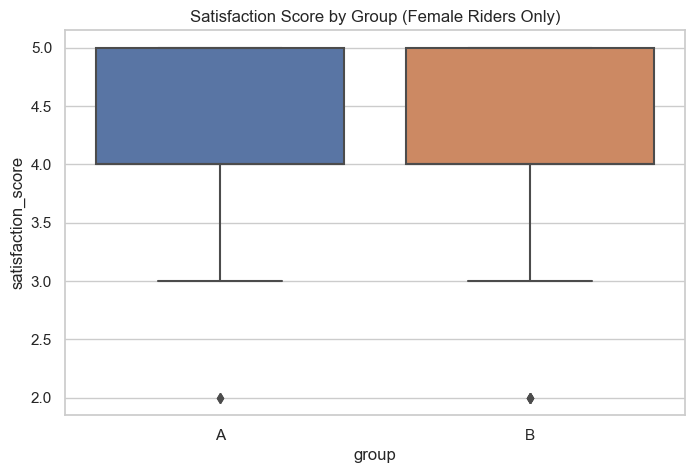

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="group", y="satisfaction_score", data=df_clean[df_clean['rider_gender'] == 'F'])
plt.title("Satisfaction Score by Group (Female Riders Only)")
plt.show()


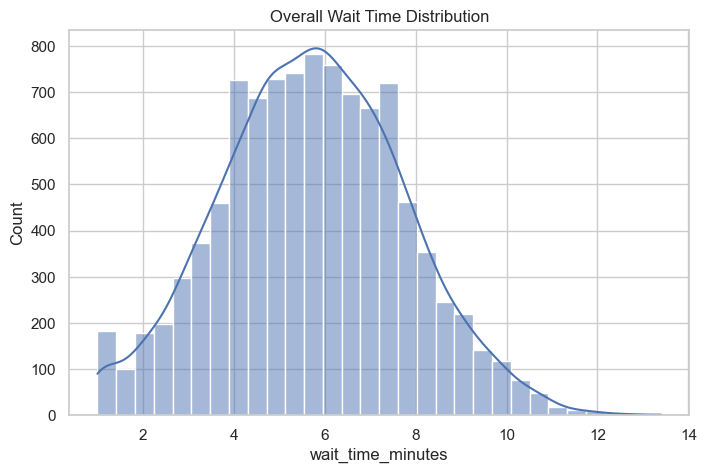

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['wait_time_minutes'], bins=30, kde=True)
plt.title("Overall Wait Time Distribution")
plt.show()
